In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
from sklearn.preprocessing import StandardScaler
from fastdtw import fastdtw
import scipy.stats
import seaborn as sns
import matplotlib.patches as patches
import matplotlib.dates as mdates
import datetime
import math
from collections import Counter

# Loading Twitter data: Anxiété 

### Format Output

In [2]:
anxiety_df = pd.read_csv('Documents/anxiety_tweets_HAD.csv')
anxiety_df['date']= pd.to_datetime(anxiety_df['date'], infer_datetime_format=True, utc=True, errors='coerce')

In [3]:
output_df = pd.DataFrame(anxiety_df.set_index('date').resample('W-SUN').count()['content'])

In [4]:
output_df.reset_index(inplace=True)
output_df = output_df.rename(columns={'content': 'anxiety_tweets_counts'})
output_df


date  anxiety_tweets_counts
0   2019-01-06 00:00:00+00:00                   1032
1   2019-01-13 00:00:00+00:00                   1281
2   2019-01-20 00:00:00+00:00                   1192
3   2019-01-27 00:00:00+00:00                   1144
4   2019-02-03 00:00:00+00:00                   1605
..                        ...                    ...
116 2021-03-28 00:00:00+00:00                   3385
117 2021-04-04 00:00:00+00:00                   3224
118 2021-04-11 00:00:00+00:00                   3297
119 2021-04-18 00:00:00+00:00                   3239
120 2021-04-25 00:00:00+00:00                   1524

[121 rows x 2 columns]

In [5]:
#Marking weeks that were during confinements or not
confinement = []
for i in range(120):
    if (i >=62 and i <=70) or (i >=94 and i <=101):
        confinement.append("yes")
    else:
        confinement.append("no")
output_df['confinement'] = pd.Series(confinement)
#62 to 70 confinement 1 
#94 to 101 confinement 2
#102 until today curfew

In [6]:
#Removing uncomplete week 
output_df = output_df.drop(120)

### Graph

In [7]:
fig = px.bar(output_df[52:], x='date', y='anxiety_tweets_counts', color="confinement", title="Weekly counts of french language Tweets with the word 'anxiété' between 2020 and today", labels={"anxiety_tweets_counts":"Number of tweets", "date":"Weeks"})
fig.show()

In [8]:
len(anxiety_df)

289373

# Loading Twitter data: Tendu

### Format Output

In [9]:
tendu_df = pd.read_csv('Documents/tendu_tweets.csv')
tendu_df['date']= pd.to_datetime(tendu_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(tendu_tweet_counts = list(list([np.nan for _ in range(52)]) + list(tendu_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  
..                  ...  
115              5044.0  
116              4739.0  
117              4500.0  
118              5035.0  
119              5215.0  

[120 rows x 4 columns]

### Graph

In [10]:
#Graph
fig = px.bar(output_df[52:], x='date', y='tendu_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'tendu' between 2020 and today", labels={"tendu_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

# Loading Twitter data: Enervé

### Format Output

In [11]:
enerve_df = pd.read_csv('Documents/enerve_tweets.csv')
enerve_df['date']= pd.to_datetime(enerve_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(enerve_tweet_counts = list(list([np.nan for _ in range(52)]) + list(enerve_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  enerve_tweet_counts  
0                   NaN                  NaN  
1                   NaN                  NaN  
2                   NaN                  NaN  
3                   NaN                  NaN  
4                   NaN                  NaN  
..                  ...                  ...  
115              5044.0              29425.0  
116              4739.0              26999.0  
117              4500.0              27961.0  
118              5035.0              29836.0  
119              5215.0              27832.0  

[120 rows x 5 columns]

### Graph

In [12]:
fig = px.bar(output_df[52:], x='date', y='enerve_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'tendu' between 2020 and today", labels={"enerve_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

# Loading Twitter data:  Souci

### Format Output

In [13]:
souci_df = pd.read_csv('Documents/souci_tweets.csv')
souci_df['date']= pd.to_datetime(souci_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(souci_tweet_counts = list(list([np.nan for _ in range(52)]) + list(souci_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

/Users/camilleduquesne/miniconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (4,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.



date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  enerve_tweet_counts  souci_tweet_counts  
0                   NaN                  NaN                 NaN  
1                   NaN                  NaN                 NaN  
2                   NaN                  NaN                 NaN  
3                   NaN                  NaN                 NaN  
4                   NaN                  NaN                 NaN  
..                  ...                  ...                 ...  
115              5044.0              29425.0             32501.0  
116              4739.0              26999.0             31963.0  
117              4500.0              27961.0             30411.0  
118              5035.0              29836.0             32924.0  
119              5215.0              27832.0             31335.0  

[120 rows x 6 columns]

### Graph

In [14]:
fig = px.bar(output_df[52:], x='date', y='souci_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'tendu' between 2020 and today", labels={"souci_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

# Loading Twitter data: Tranquille

### Format Output

In [15]:
tranquille_df = pd.read_csv('Documents/tranquille_tweets.csv')
tranquille_df['date']= pd.to_datetime(tranquille_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(tranquille_tweet_counts = list(list([np.nan for _ in range(52)]) + list(tranquille_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

/Users/camilleduquesne/miniconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (4,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.



date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  enerve_tweet_counts  souci_tweet_counts  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
..                  ...                  ...                 ...   
115              5044.0              29425.0             32501.0   
116              4739.0              26999.0             31963.0   
117              4500.0              27961.0             30411.0   
118              5035.0              29836.0             32924.0   
119              5215.0              27832.0             31335.0   

     tranquille_tweet_counts  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
..                       ...  
115                  30421.0  
116                  27910.0  
117                  28867.0  
118                  30270.0  
119                  28314.0  

[120 rows x 7 columns]

### Graph

In [16]:
fig = px.bar(output_df[52:], x='date', y='tranquille_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'tendu' between 2020 and today", labels={"tranquille_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

# Loading Twitter data:  Decontracte

### Format Output

In [17]:
decontracte_df = pd.read_csv('Documents/decontracte_tweets.csv')
decontracte_df['date']= pd.to_datetime(decontracte_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(decontracte_tweet_counts = list(list([np.nan for _ in range(52)]) + list(decontracte_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  enerve_tweet_counts  souci_tweet_counts  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
..                  ...                  ...                 ...   
115              5044.0              29425.0             32501.0   
116              4739.0              26999.0             31963.0   
117              4500.0              27961.0             30411.0   
118              5035.0              29836.0             32924.0   
119              5215.0              27832.0             31335.0   

     tranquille_tweet_counts  decontracte_tweet_counts  
0                        NaN                       NaN  
1                        NaN                       NaN  
2                        NaN                       NaN  
3                        NaN                       NaN  
4                        NaN                       NaN  
..                       ...                       ...  
115                  30421.0                     290.0  
116                  27910.0                     287.0  
117                  28867.0                     297.0  
118                  30270.0                     336.0  
119                  28314.0                     278.0  

[120 rows x 8 columns]

### Graph

In [18]:
fig = px.bar(output_df[52:], x='date', y='decontracte_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'tendu' between 2020 and today", labels={"decontracte_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

In [19]:
sum(list(output_df['decontracte_tweet_counts'][52:]))

17302.0

# Loading Twitter data:  Depression

In [20]:
depression_df = pd.read_csv('Documents/depression_tweets.csv')
depression_df['date']= pd.to_datetime(depression_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(depression_tweet_counts = list(list([np.nan for _ in range(52)]) + list(depression_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

/Users/camilleduquesne/miniconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (2,3,4,5,6,7,10,11,12,13,14,15,16,17,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.



date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  enerve_tweet_counts  souci_tweet_counts  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
..                  ...                  ...                 ...   
115              5044.0              29425.0             32501.0   
116              4739.0              26999.0             31963.0   
117              4500.0              27961.0             30411.0   
118              5035.0              29836.0             32924.0   
119              5215.0              27832.0             31335.0   

     tranquille_tweet_counts  decontracte_tweet_counts  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   
..                       ...                       ...   
115                  30421.0                     290.0   
116                  27910.0                     287.0   
117                  28867.0                     297.0   
118                  30270.0                     336.0   
119                  28314.0                     278.0   

     depression_tweet_counts  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  
..                       ...  
115                  13328.0  
116                  21541.0  
117                   9845.0  
118                  11205.0  
119                  10794.0  

[120 rows x 9 columns]

In [21]:
fig = px.bar(output_df[52:], x='date', y='depression_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'dépression' between 2020 and today", labels={"depression_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

# Loading Twitter data:  Insouciance

In [22]:
insouciance_df = pd.read_csv('Documents/insouciance_tweets.csv')
insouciance_df['date']= pd.to_datetime(insouciance_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(insouciance_tweet_counts = list(list([np.nan for _ in range(52)]) + list(insouciance_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  enerve_tweet_counts  souci_tweet_counts  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
..                  ...                  ...                 ...   
115              5044.0              29425.0             32501.0   
116              4739.0              26999.0             31963.0   
117              4500.0              27961.0             30411.0   
118              5035.0              29836.0             32924.0   
119              5215.0              27832.0             31335.0   

     tranquille_tweet_counts  decontracte_tweet_counts  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   
..                       ...                       ...   
115                  30421.0                     290.0   
116                  27910.0                     287.0   
117                  28867.0                     297.0   
118                  30270.0                     336.0   
119                  28314.0                     278.0   

     depression_tweet_counts  insouciance_tweet_counts  
0                        NaN                       NaN  
1                        NaN                       NaN  
2                        NaN                       NaN  
3                        NaN                       NaN  
4                        NaN                       NaN  
..                       ...                       ...  
115                  13328.0                    2658.0  
116                  21541.0                    1515.0  
117                   9845.0                    1269.0  
118                  11205.0                    1022.0  
119                  10794.0                     962.0  

[120 rows x 10 columns]

In [23]:
fig = px.bar(output_df[52:], x='date', y='insouciance_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'insouciance' between 2020 and today", labels={"insouciance_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

# Loading Twitter data:  Humeur

In [24]:
#s1 = pd.read_json('Documents/humeur.json', lines=True)
#s2 = pd.read_json('Documents/humeurBIS.json', lines=True)
#s3 = pd.read_json('Documents/humeurTER.json', lines=True)
#s4 = pd.read_json('Documents/humeur4.json', lines=True)
#ss = pd.concat([s1, s2, s3, s4])
#ssn = ss.drop_duplicates(subset='id', keep='first')
#ssn.to_csv('humeur_tweets.csv', index=False)

In [25]:
humeur_df = pd.read_csv('humeur_tweets.csv')
humeur_df['date']= pd.to_datetime(humeur_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(humeur_tweet_counts = list(list([np.nan for _ in range(52)]) + list(humeur_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

/Users/camilleduquesne/miniconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (2,3,4,5,6,7,10,11,12,13,14,15,16,17,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.



date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  enerve_tweet_counts  souci_tweet_counts  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
..                  ...                  ...                 ...   
115              5044.0              29425.0             32501.0   
116              4739.0              26999.0             31963.0   
117              4500.0              27961.0             30411.0   
118              5035.0              29836.0             32924.0   
119              5215.0              27832.0             31335.0   

     tranquille_tweet_counts  decontracte_tweet_counts  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   
..                       ...                       ...   
115                  30421.0                     290.0   
116                  27910.0                     287.0   
117                  28867.0                     297.0   
118                  30270.0                     336.0   
119                  28314.0                     278.0   

     depression_tweet_counts  insouciance_tweet_counts  humeur_tweet_counts  
0                        NaN                       NaN                  NaN  
1                        NaN                       NaN                  NaN  
2                        NaN                       NaN                  NaN  
3                        NaN                       NaN                  NaN  
4                        NaN                       NaN                  NaN  
..                       ...                       ...                  ...  
115                  13328.0                    2658.0               9397.0  
116                  21541.0                    1515.0               9976.0  
117                   9845.0                    1269.0              10517.0  
118                  11205.0                    1022.0               9019.0  
119                  10794.0                     962.0               8699.0  

[120 rows x 11 columns]

In [26]:
fig = px.bar(output_df[52:], x='date', y='humeur_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'humeur' between 2020 and today", labels={"humeur_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

# Loading Twitter data:  Ralenti

In [27]:
ralenti_df = pd.read_csv('Documents/ralenti_tweets.csv')
ralenti_df['date']= pd.to_datetime(ralenti_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(ralenti_tweet_counts = list(list([np.nan for _ in range(52)]) + list(ralenti_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

/Users/camilleduquesne/miniconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (2,3,4,5,6,7,10,11,12,13,14,15,16,17,19,20,21,22) have mixed types.Specify dtype option on import or set low_memory=False.



date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  enerve_tweet_counts  souci_tweet_counts  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
..                  ...                  ...                 ...   
115              5044.0              29425.0             32501.0   
116              4739.0              26999.0             31963.0   
117              4500.0              27961.0             30411.0   
118              5035.0              29836.0             32924.0   
119              5215.0              27832.0             31335.0   

     tranquille_tweet_counts  decontracte_tweet_counts  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   
..                       ...                       ...   
115                  30421.0                     290.0   
116                  27910.0                     287.0   
117                  28867.0                     297.0   
118                  30270.0                     336.0   
119                  28314.0                     278.0   

     depression_tweet_counts  insouciance_tweet_counts  humeur_tweet_counts  \
0                        NaN                       NaN                  NaN   
1                        NaN                       NaN                  NaN   
2                        NaN                       NaN                  NaN   
3                        NaN                       NaN                  NaN   
4                        NaN                       NaN                  NaN   
..                       ...                       ...                  ...   
115                  13328.0                    2658.0               9397.0   
116                  21541.0                    1515.0               9976.0   
117                   9845.0                    1269.0              10517.0   
118                  11205.0                    1022.0               9019.0   
119                  10794.0                     962.0               8699.0   

     ralenti_tweet_counts  
0                     NaN  
1                     NaN  
2                     NaN  
3                     NaN  
4                     NaN  
..                    ...  
115                3278.0  
116                3257.0  
117                3057.0  
118                3080.0  
119                2952.0  

[120 rows x 12 columns]

In [28]:
fig = px.bar(output_df[52:], x='date', y='ralenti_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'ralenti' between 2020 and today", labels={"ralenti_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

# Loading Twitter data:  Apparence

In [29]:
apparence_df = pd.read_csv('Documents/apparence_tweets.csv')
apparence_df['date']= pd.to_datetime(apparence_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(apparence_tweet_counts = list(list([np.nan for _ in range(52)]) + list(apparence_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

/Users/camilleduquesne/miniconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (4,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.



date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  enerve_tweet_counts  souci_tweet_counts  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
..                  ...                  ...                 ...   
115              5044.0              29425.0             32501.0   
116              4739.0              26999.0             31963.0   
117              4500.0              27961.0             30411.0   
118              5035.0              29836.0             32924.0   
119              5215.0              27832.0             31335.0   

     tranquille_tweet_counts  decontracte_tweet_counts  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   
..                       ...                       ...   
115                  30421.0                     290.0   
116                  27910.0                     287.0   
117                  28867.0                     297.0   
118                  30270.0                     336.0   
119                  28314.0                     278.0   

     depression_tweet_counts  insouciance_tweet_counts  humeur_tweet_counts  \
0                        NaN                       NaN                  NaN   
1                        NaN                       NaN                  NaN   
2                        NaN                       NaN                  NaN   
3                        NaN                       NaN                  NaN   
4                        NaN                       NaN                  NaN   
..                       ...                       ...                  ...   
115                  13328.0                    2658.0               9397.0   
116                  21541.0                    1515.0               9976.0   
117                   9845.0                    1269.0              10517.0   
118                  11205.0                    1022.0               9019.0   
119                  10794.0                     962.0               8699.0   

     ralenti_tweet_counts  apparence_tweet_counts  
0                     NaN                     NaN  
1                     NaN                     NaN  
2                     NaN                     NaN  
3                     NaN                     NaN  
4                     NaN                     NaN  
..                    ...                     ...  
115                3278.0                  2854.0  
116                3257.0                  2901.0  
117                3057.0                  2868.0  
118                3080.0                  3035.0  
119                2952.0                  2741.0  

[120 rows x 13 columns]

In [30]:
fig = px.bar(output_df[52:], x='date', y='apparence_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'apparence' between 2020 and today", labels={"apparence_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

# Loading Twitter data:  Réjouir

In [31]:
rejouir_df = pd.read_csv('Documents/rejouir_tweets.csv')
rejouir_df['date']= pd.to_datetime(rejouir_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(rejouir_tweet_counts = list(list([np.nan for _ in range(52)]) + list(rejouir_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

/Users/camilleduquesne/miniconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (4,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.



date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  enerve_tweet_counts  souci_tweet_counts  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
..                  ...                  ...                 ...   
115              5044.0              29425.0             32501.0   
116              4739.0              26999.0             31963.0   
117              4500.0              27961.0             30411.0   
118              5035.0              29836.0             32924.0   
119              5215.0              27832.0             31335.0   

     tranquille_tweet_counts  decontracte_tweet_counts  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   
..                       ...                       ...   
115                  30421.0                     290.0   
116                  27910.0                     287.0   
117                  28867.0                     297.0   
118                  30270.0                     336.0   
119                  28314.0                     278.0   

     depression_tweet_counts  insouciance_tweet_counts  humeur_tweet_counts  \
0                        NaN                       NaN                  NaN   
1                        NaN                       NaN                  NaN   
2                        NaN                       NaN                  NaN   
3                        NaN                       NaN                  NaN   
4                        NaN                       NaN                  NaN   
..                       ...                       ...                  ...   
115                  13328.0                    2658.0               9397.0   
116                  21541.0                    1515.0               9976.0   
117                   9845.0                    1269.0              10517.0   
118                  11205.0                    1022.0               9019.0   
119                  10794.0                     962.0               8699.0   

     ralenti_tweet_counts  apparence_tweet_counts  rejouir_tweet_counts  
0                     NaN                     NaN                   NaN  
1                     NaN                     NaN                   NaN  
2                     NaN                     NaN                   NaN  
3                     NaN                     NaN                   NaN  
4                     NaN                     NaN                   NaN  
..                    ...                     ...                   ...  
115                3278.0                  2854.0                3903.0  
116                3257.0                  2901.0                3460.0  
117                3057.0                  2868.0                4623.0  
118  

In [32]:
fig = px.bar(output_df[52:], x='date', y='rejouir_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'rejouir' between 2020 and today", labels={"rejouir_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

# Loading Twitter Data: Lampe

In [33]:
#s1 = pd.read_json('Documents/lampe.json', lines=True)
#s2 = pd.read_json('Documents/lampeBIS.json', lines=True)
#ss = pd.concat([s1, s2])
#ssn= ss.drop_duplicates(subset='id', keep='first')
#ssn.to_csv('lampe_tweets.csv', index=False)

In [34]:
lampe_df = pd.read_csv('lampe_tweets.csv')
lampe_df['date']= pd.to_datetime(lampe_df['date'], infer_datetime_format=True, utc=True, errors='coerce')
output_df = output_df.assign(lampe_tweet_counts = list(list([np.nan for _ in range(52)]) + list(lampe_df.set_index('date').resample('W-SUN').count()['content'])[:68]))
output_df

/Users/camilleduquesne/miniconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning:

Columns (4,10,11,12) have mixed types.Specify dtype option on import or set low_memory=False.



date  anxiety_tweets_counts confinement  \
0   2019-01-06 00:00:00+00:00                   1032          no   
1   2019-01-13 00:00:00+00:00                   1281          no   
2   2019-01-20 00:00:00+00:00                   1192          no   
3   2019-01-27 00:00:00+00:00                   1144          no   
4   2019-02-03 00:00:00+00:00                   1605          no   
..                        ...                    ...         ...   
115 2021-03-21 00:00:00+00:00                   3378          no   
116 2021-03-28 00:00:00+00:00                   3385          no   
117 2021-04-04 00:00:00+00:00                   3224          no   
118 2021-04-11 00:00:00+00:00                   3297          no   
119 2021-04-18 00:00:00+00:00                   3239          no   

     tendu_tweet_counts  enerve_tweet_counts  souci_tweet_counts  \
0                   NaN                  NaN                 NaN   
1                   NaN                  NaN                 NaN   
2                   NaN                  NaN                 NaN   
3                   NaN                  NaN                 NaN   
4                   NaN                  NaN                 NaN   
..                  ...                  ...                 ...   
115              5044.0              29425.0             32501.0   
116              4739.0              26999.0             31963.0   
117              4500.0              27961.0             30411.0   
118              5035.0              29836.0             32924.0   
119              5215.0              27832.0             31335.0   

     tranquille_tweet_counts  decontracte_tweet_counts  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3                        NaN                       NaN   
4                        NaN                       NaN   
..                       ...                       ...   
115                  30421.0                     290.0   
116                  27910.0                     287.0   
117                  28867.0                     297.0   
118                  30270.0                     336.0   
119                  28314.0                     278.0   

     depression_tweet_counts  insouciance_tweet_counts  humeur_tweet_counts  \
0                        NaN                       NaN                  NaN   
1                        NaN                       NaN                  NaN   
2                        NaN                       NaN                  NaN   
3                        NaN                       NaN                  NaN   
4                        NaN                       NaN                  NaN   
..                       ...                       ...                  ...   
115                  13328.0                    2658.0               9397.0   
116                  21541.0                    1515.0               9976.0   
117                   9845.0                    1269.0              10517.0   
118                  11205.0                    1022.0               9019.0   
119                  10794.0                     962.0               8699.0   

     ralenti_tweet_counts  apparence_tweet_counts  rejouir_tweet_counts  \
0                     NaN                     NaN                   NaN   
1                     NaN                     NaN                   NaN   
2                     NaN                     NaN                   NaN   
3                     NaN                     NaN                   NaN   
4                     NaN                     NaN                   NaN   
..                    ...                     ...                   ...   
115                3278.0                  2854.0                3903.0   
116                3257.0                  2901.0                3460.0   
117                3057.0                  2868.0                4623.

In [35]:
fig = px.bar(output_df[52:], x='date', y='lampe_tweet_counts', color="confinement", title="Weekly counts of french language tweets with the word 'lampe' between 2020 and today", labels={"lampe_tweet_counts":"Number of tweets", "date":"Weeks"})
fig.show()

# Loading CovidPrev data

In [54]:
dfs = pd.read_excel("Downloads/geodes-dpps-sante-mentale-v1-v23.xlsx", sheet_name=None)
dfs

/Users/camilleduquesne/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning:

Your version of xlrd is 1.2.0. In xlrd >= 2.0, only the xls format is supported. As a result, the openpyxl engine will be used if it is installed and the engine argument is not specified. Install openpyxl instead.



{'fra':    fra                   semaine  anxiete  anxiete_inf  anxiete_sup  \
 0   fr      Vague 1 : 23-25 mars  26.7000     24.80000     28.70000   
 1   fr   Vague 2 : 30 mars-1 avr  21.5000     19.80000     23.40000   
 2   fr       Vague 3 : 14-16 avr  18.1000     16.50000     19.90000   
 3   fr       Vague 4 : 20-22 avr  18.9000     17.20000     20.70000   
 4   fr       Vague 5 : 28-30 avr  18.1000     16.40000     19.90000   
 5   fr         Vague 6 : 4-6 mai  18.4000     16.70000     20.20000   
 6   fr       Vague 7 : 13-15 mai  17.6000     15.90000     19.40000   
 7   fr       Vague 8 : 18-20 mai  16.9000     15.30000     18.70000   
 8   fr       Vague 9 : 27-29 mai  16.5000     14.90000     18.20000   
 9   fr      Vague 10 : 8-10 juin  15.9000     14.40000     17.70000   
 10  fr     Vague 11 : 22-24 juin  15.1000     13.60000     16.70000   
 11  fr    Vague 12 : 6-8 juillet  17.0000     15.40000     18.80000   
 12  fr  Vague 13 : 20-22 juillet  17.5633     15.91075  

### Anxiety

In [37]:
#Connecting each CovidPrev Session with its coresponding week
output_df.at[63, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][0]
output_df.at[64, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][1]
output_df.at[66, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][2]
output_df.at[67, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][3]
output_df.at[68, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][4]
output_df.at[69, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][5]
output_df.at[70, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][6]
output_df.at[71, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][7]
output_df.at[72, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][8]
output_df.at[74, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][9]
output_df.at[76, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][10]
output_df.at[78, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][11]
output_df.at[80, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][12]
output_df.at[85, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][13]
output_df.at[89, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][14]
output_df.at[93, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][15]
output_df.at[95, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][16]
output_df.at[98, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][17]
output_df.at[101, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][18]
output_df.at[106, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][19]
output_df.at[110, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][20]
output_df.at[114, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][21]
output_df.at[119, 'CovidPrev_Anxiete'] = dfs['fra']['anxiete'][22]

In [38]:
#Inferring missing data points for covidPrev
output_df['CovidPrev_Anxiete'][63:] = output_df['CovidPrev_Anxiete'][63:].interpolate()

/Users/camilleduquesne/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### Depression

In [39]:
#Connecting each CovidPrev Session with its coresponding week
output_df.at[63, 'CovidPrev_Depression'] = dfs['fra']['depression'][1]
output_df.at[63, 'CovidPrev_Depression'] = dfs['fra']['depression'][1]
output_df.at[64, 'CovidPrev_Depression'] = dfs['fra']['depression'][1]
output_df.at[66, 'CovidPrev_Depression'] = dfs['fra']['depression'][2]
output_df.at[67, 'CovidPrev_Depression'] = dfs['fra']['depression'][3]
output_df.at[68, 'CovidPrev_Depression'] = dfs['fra']['depression'][4]
output_df.at[69, 'CovidPrev_Depression'] = dfs['fra']['depression'][5]
output_df.at[70, 'CovidPrev_Depression'] = dfs['fra']['depression'][6]
output_df.at[71, 'CovidPrev_Depression'] = dfs['fra']['depression'][7]
output_df.at[72, 'CovidPrev_Depression'] = dfs['fra']['depression'][8]
output_df.at[74, 'CovidPrev_Depression'] = dfs['fra']['depression'][9]
output_df.at[76, 'CovidPrev_Depression'] = dfs['fra']['depression'][10]
output_df.at[78, 'CovidPrev_Depression'] = dfs['fra']['depression'][11]
output_df.at[80, 'CovidPrev_Depression'] = dfs['fra']['depression'][12]
output_df.at[85, 'CovidPrev_Depression'] = dfs['fra']['depression'][13]
output_df.at[89, 'CovidPrev_Depression'] = dfs['fra']['depression'][14]
output_df.at[93, 'CovidPrev_Depression'] = dfs['fra']['depression'][15]
output_df.at[95, 'CovidPrev_Depression'] = dfs['fra']['depression'][16]
output_df.at[98, 'CovidPrev_Depression'] = dfs['fra']['depression'][17]
output_df.at[101, 'CovidPrev_Depression'] = dfs['fra']['depression'][18]
output_df.at[106, 'CovidPrev_Depression'] = dfs['fra']['depression'][19]
output_df.at[110, 'CovidPrev_Depression'] = dfs['fra']['depression'][20]
output_df.at[114, 'CovidPrev_Depression'] = dfs['fra']['depression'][21]
output_df.at[119, 'CovidPrev_Depression'] = dfs['fra']['depression'][22]

In [40]:
#Inferring missing data points for covidPrev
output_df['CovidPrev_Depression'][63:] = output_df['CovidPrev_Depression'][63:].interpolate()

/Users/camilleduquesne/miniconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [41]:
dfs['fra']['depression'][1]

19.9

# Standardizing the data and computing the correlation

In [42]:
output_df.columns

Index(['date', 'anxiety_tweets_counts', 'confinement', 'tendu_tweet_counts',
       'enerve_tweet_counts', 'souci_tweet_counts', 'tranquille_tweet_counts',
       'decontracte_tweet_counts', 'depression_tweet_counts',
       'insouciance_tweet_counts', 'humeur_tweet_counts',
       'ralenti_tweet_counts', 'apparence_tweet_counts',
       'rejouir_tweet_counts', 'lampe_tweet_counts', 'CovidPrev_Anxiete',
       'CovidPrev_Depression'],
      dtype='object')

<AxesSubplot:>

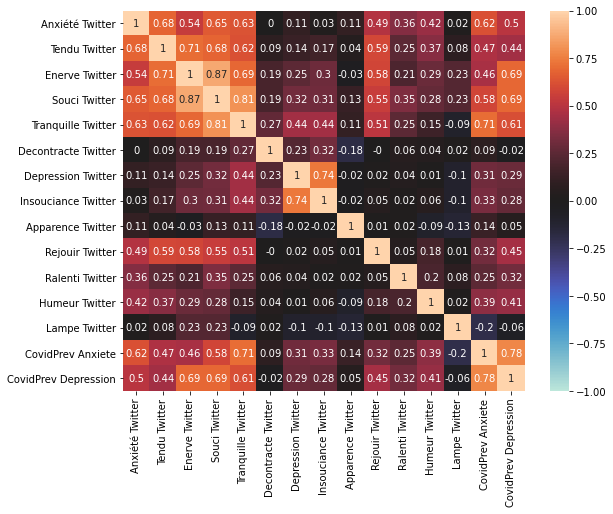

In [73]:
from sklearn.preprocessing import StandardScaler

data = output_df[[ 'anxiety_tweets_counts', 'tendu_tweet_counts',
       'enerve_tweet_counts', 'souci_tweet_counts', 'tranquille_tweet_counts',
       'decontracte_tweet_counts', 'depression_tweet_counts',
       'insouciance_tweet_counts', 'apparence_tweet_counts',
       'rejouir_tweet_counts', 'ralenti_tweet_counts','humeur_tweet_counts','lampe_tweet_counts', 'CovidPrev_Anxiete',
       'CovidPrev_Depression']][52:119]

scale= StandardScaler()
scaled_data = scale.fit_transform(data) 
scaled_data = pd.DataFrame(scaled_data)
scaled_data

from fastdtw import fastdtw
import scipy.stats
import seaborn as sns

#keywords = data.columns
keywords = [ 'Anxiété Twitter', 'Tendu Twitter',
       'Enerve Twitter', 'Souci Twitter', 'Tranquille Twitter',
       'Decontracte Twitter', 'Depression Twitter',
       'Insouciance Twitter', 'Apparence Twitter',
       'Rejouir Twitter', 'Ralenti Twitter','Humeur Twitter','Lampe Twitter', 'CovidPrev Anxiete',
       'CovidPrev Depression']


corr = [[0 for _ in range(len(keywords)) ] for _ in range(len(keywords))]
for x in range(len(keywords)):
    for y in range(len(keywords)):
        #print(keywords[x], keywords[y])
        #print(scipy.stats.pearsonr(scaled_data2[x], scaled_data2[y])[0])
        corr[x][y] = round(scipy.stats.pearsonr(list(scaled_data[x][11:]), list(scaled_data[y][11:]))[0], 2)
#print(corr)
fig, ax = plt.subplots(figsize=(9,7))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, yticklabels=keywords, xticklabels=keywords, annot=True)
plt.savefig('Fig1.png')
ax

# Plotting the time series for Anxiety

In [44]:
#Labeling the standardized data 
scaled_data.columns = [ 'anxiety_tweets_counts', 'tendu_tweet_counts',
       'enerve_tweet_counts', 'souci_tweet_counts', 'tranquille_tweet_counts',
       'decontracte_tweet_counts', 'depression_tweet_counts',
       'insouciance_tweet_counts', 'apparence_tweet_counts',
       'rejouir_tweet_counts', 'ralenti_tweet_counts','humeur_tweet_counts','lampe_tweet_counts', 'CovidPrev_Anxiete',
       'CovidPrev_Depression']

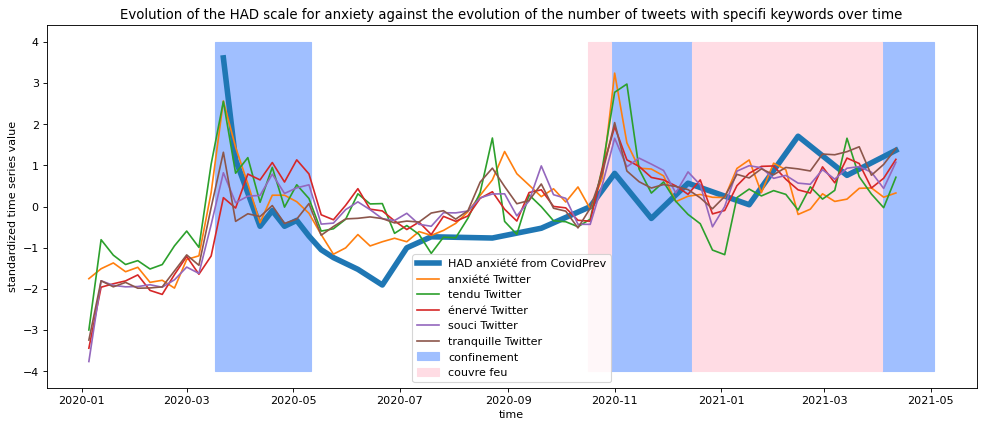

In [45]:
import matplotlib.patches as patches
import matplotlib.dates as mdates
import datetime

## 17 mars au 11 mai 1er confinement 
## 30 octobre, 15 decembre confinement 
## Couvre feu depuis 16 decembre (26 février 3e confinement ??? )
#figure(figsize=(15, 5), dpi=80)
fig, ax = plt.subplots(figsize=(15, 6), dpi=80)
#figure(figsize=(15, 5), dpi=80)
plt.plot(output_df['date'][52:119], scaled_data['CovidPrev_Anxiete'], label="HAD anxiété from CovidPrev", linewidth=5.0)
plt.plot(output_df['date'][52:119], scaled_data['anxiety_tweets_counts'], label="anxiété Twitter")
plt.plot(output_df['date'][52:119], scaled_data['tendu_tweet_counts'], label="tendu Twitter")
plt.plot(output_df['date'][52:119], scaled_data['enerve_tweet_counts'], label="énervé Twitter")
plt.plot(output_df['date'][52:119], scaled_data['souci_tweet_counts'], label="souci Twitter")
plt.plot(output_df['date'][52:119], scaled_data['tranquille_tweet_counts'], label="tranquille Twitter")
#ax.axvspan(5, 2020-4-22, color='red')

conf1start = mdates.date2num(datetime.date(2020, 3, 17))
conf1end = mdates.date2num(datetime.date(2020, 5, 11))
conf1length = conf1end - conf1start
conf1 = patches.Rectangle((conf1start,-4), conf1length, 8, color="#a0bfff", label="confinement")
ax.add_patch(conf1)

conf2start = mdates.date2num(datetime.date(2020, 10, 30))
conf2end = mdates.date2num(datetime.date(2020, 12, 15))
conf2length = conf2end - conf2start
conf2 = patches.Rectangle((conf2start,-4), conf2length, 8, color="#a0bfff")
ax.add_patch(conf2)


conf3start = mdates.date2num(datetime.date(2021, 4, 3))
conf3end = mdates.date2num(datetime.date(2021, 5, 3))
conf3length = conf3end - conf3start
conf3 = patches.Rectangle((conf3start,-4), conf3length, 8, color="#a0bfff")
ax.add_patch(conf3)

cvfeu1start = mdates.date2num(datetime.date(2020, 10, 17))
cvfeu1end = mdates.date2num(datetime.date(2020, 10, 30))
cvfeu1length = cvfeu1end - cvfeu1start
cvfeu1 = patches.Rectangle((cvfeu1start,-4), cvfeu1length, 8, color="#FFDCE4", label="couvre feu")
ax.add_patch(cvfeu1)

cvfeu2start = mdates.date2num(datetime.date(2020, 12, 15))
cvfeu2end = mdates.date2num(datetime.date(2021, 4, 3))
cvfeu2length = cvfeu2end - cvfeu2start
cvfeu2 = patches.Rectangle((cvfeu2start,-4), cvfeu2length, 8, color="#FFDCE4")
ax.add_patch(cvfeu2)

plt.xlabel('time')
plt.ylabel('standardized time series value')
plt.title('Evolution of the HAD scale for anxiety against the evolution of the number of tweets with specifi keywords over time')

plt.legend()
plt.show()

# Plotting Time Series for Depression

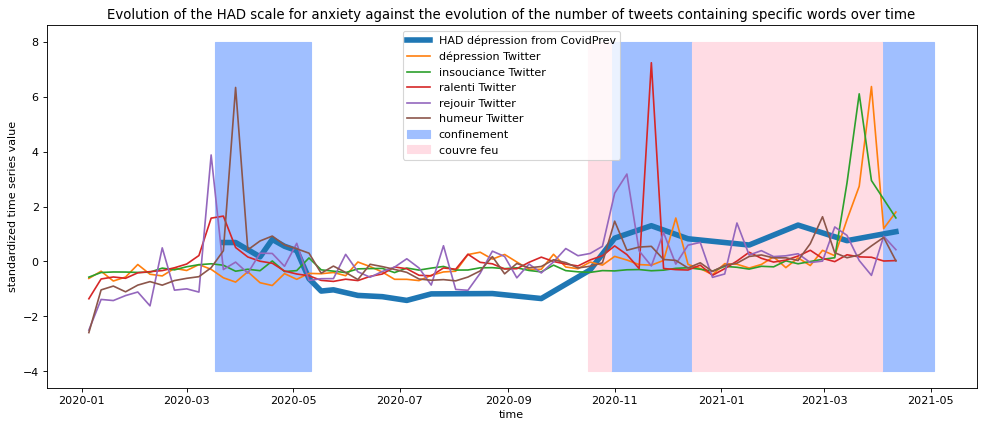

In [46]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=80)
#figure(figsize=(15, 5), dpi=80)
plt.plot(output_df['date'][52:119], scaled_data['CovidPrev_Depression'], label="HAD dépression from CovidPrev", linewidth=5.0)
plt.plot(output_df['date'][52:119], scaled_data['depression_tweet_counts'], label="dépression Twitter")
plt.plot(output_df['date'][52:119], scaled_data['insouciance_tweet_counts'], label="insouciance Twitter")
plt.plot(output_df['date'][52:119], scaled_data['ralenti_tweet_counts'], label="ralenti Twitter")
plt.plot(output_df['date'][52:119], scaled_data['rejouir_tweet_counts'], label="rejouir Twitter")
plt.plot(output_df['date'][52:119], scaled_data['humeur_tweet_counts'], label="humeur Twitter")
#plt.plot(output_df['date'][52:119], scaled_data['tranquille_tweet_counts'], label="tranquille Twitter")
#ax.axvspan(5, 2020-4-22, color='red')

conf1start = mdates.date2num(datetime.date(2020, 3, 17))
conf1end = mdates.date2num(datetime.date(2020, 5, 11))
conf1length = conf1end - conf1start
conf1 = patches.Rectangle((conf1start,-4), conf1length, 12, color="#a0bfff", label="confinement")
ax.add_patch(conf1)

conf2start = mdates.date2num(datetime.date(2020, 10, 30))
conf2end = mdates.date2num(datetime.date(2020, 12, 15))
conf2length = conf2end - conf2start
conf2 = patches.Rectangle((conf2start,-4), conf2length, 12, color="#a0bfff")
ax.add_patch(conf2)


conf3start = mdates.date2num(datetime.date(2021, 4, 3))
conf3end = mdates.date2num(datetime.date(2021, 5, 3))
conf3length = conf3end - conf3start
conf3 = patches.Rectangle((conf3start,-4), conf3length, 12, color="#a0bfff")
ax.add_patch(conf3)

cvfeu1start = mdates.date2num(datetime.date(2020, 10, 17))
cvfeu1end = mdates.date2num(datetime.date(2020, 10, 30))
cvfeu1length = cvfeu1end - cvfeu1start
cvfeu1 = patches.Rectangle((cvfeu1start,-4), cvfeu1length, 12, color="#FFDCE4", label="couvre feu")
ax.add_patch(cvfeu1)

cvfeu2start = mdates.date2num(datetime.date(2020, 12, 15))
cvfeu2end = mdates.date2num(datetime.date(2021, 4, 3))
cvfeu2length = cvfeu2end - cvfeu2start
cvfeu2 = patches.Rectangle((cvfeu2start,-4), cvfeu2length, 12, color="#FFDCE4")
ax.add_patch(cvfeu2)

plt.xlabel('time')
plt.ylabel('standardized time series value')
plt.title('Evolution of the HAD scale for anxiety against the evolution of the number of tweets containing specific words over time')

plt.legend()
plt.show()

# Identifying significantly different weeks

### Anxiété Twitter

In [47]:
for i in range(1,66):
    real_point = scaled_data['anxiety_tweets_counts'][i]
    interpolated_point = (scaled_data['anxiety_tweets_counts'][i-1] + scaled_data['anxiety_tweets_counts'][i+1]) /2
    if abs(real_point - interpolated_point) >= 1:
        print(i, real_point,interpolated_point)

11 2.5630770110439554 0.8908362085604093
43 3.2408993880306136 1.124447830258486


In [48]:
output_df['date'][52+62]

Timestamp('2021-03-14 00:00:00+0000', tz='UTC')

### Tendu Twitter

In [49]:
for i in range(1,66):
    real_point = scaled_data['tendu_tweet_counts'][i]
    interpolated_point = (scaled_data['tendu_tweet_counts'][i-1] + scaled_data['tendu_tweet_counts'][i+1]) /2
    if abs(real_point - interpolated_point) >= 1:
        print(i, real_point,interpolated_point)

1 -0.8044585932465211 -2.0882219649907094
9 -0.9909115843013521 0.2182705910209039
11 2.55307637900751 0.920576857327434
12 0.8100861959616082 1.870796545073536
33 1.6650076882796854 -0.008925831412575386
44 2.9757031587317937 1.8417927464650066
62 1.659483155211394 0.559410507987891


### Enerve Twitter

In [50]:
for i in range(1,66):
    real_point = scaled_data['enerve_tweet_counts'][i]
    interpolated_point = (scaled_data['enerve_tweet_counts'][i-1] + scaled_data['enerve_tweet_counts'][i+1]) /2
    if abs(real_point - interpolated_point) >= 1:
        print(i, real_point,interpolated_point)

### Souci Twitter 

In [51]:
for i in range(1,66):
    real_point = scaled_data['souci_tweet_counts'][i]
    interpolated_point = (scaled_data['souci_tweet_counts'][i-1] + scaled_data['souci_tweet_counts'][i+1]) /2
    if abs(real_point - interpolated_point) >= 1:
        print(i, real_point,interpolated_point)

1 -1.8018876179201395 -2.838179918431198


### Tranquille Twitter

In [52]:
for i in range(1,66):
    real_point = scaled_data['tranquille_tweet_counts'][i]
    interpolated_point = (scaled_data['tranquille_tweet_counts'][i-1] + scaled_data['tranquille_tweet_counts'][i+1]) /2
    if abs(real_point - interpolated_point) >= 1:
        print(i, real_point,interpolated_point)

11 1.3189218371958862 -0.19111349341343473
43 2.0391137104637043 0.8385186189801587


### Depression Twitter

In [53]:
from collections import Counter
for i in range(1,66):
    real_point = scaled_data['depression_tweet_counts'][i]
    interpolated_point = (scaled_data['depression_tweet_counts'][i-1] + scaled_data['depression_tweet_counts'][i+1]) /2
    if abs(real_point - interpolated_point) >= 1:
        print(i, real_point,interpolated_point)
        #Get tweets of 2 days
        weekly_tweets = []
        for j in range(len(depression_df)):
            if depression_df['date'][j] >= output_df['date'][52+i] and depression_df['date'][j] <= (output_df['date'][52+i] +datetime.timedelta(7)): 
                weekly_tweets.append(depression_df['content'][j])
            #preprocess
        words = preprocess(weekly_tweets)
        #count most occurence
        from collections import Counter
        Counter = Counter(words)
        most_occur = Counter.most_common(30)
        print(most_occur)
        

48 1.5832342976216898 -0.034415553811726576


NameError: name 'preprocess' is not defined

### Insouciance twitter

In [ ]:
for i in range(1,66):
    real_point = scaled_data['insouciance_tweet_counts'][i]
    interpolated_point = (scaled_data['insouciance_tweet_counts'][i-1] + scaled_data['insouciance_tweet_counts'][i+1]) /2
    if abs(real_point - interpolated_point) >= 1:
        print(i, real_point,interpolated_point)
                #Get tweets of 2 days
        weekly_tweets = []
        for j in range(len(insouciance_df)):
            if insouciance_df['date'][j] >= output_df['date'][52+i] and insouciance_df['date'][j] <= (output_df['date'][52+i] +datetime.timedelta(7)): 
                weekly_tweets.append(insouciance_df['content'][j])
            #preprocess
        words = preprocess(weekly_tweets)
        from collections import Counter
        #count most occurence
        Counter = Counter(words)
        most_occur = Counter.most_common(30)
        print(most_occur)

### Humeur Twitter

In [ ]:
for i in range(1,66):
    real_point = scaled_data['humeur_tweet_counts'][i]
    interpolated_point = (scaled_data['humeur_tweet_counts'][i-1] + scaled_data['humeur_tweet_counts'][i+1]) /2
    if abs(real_point - interpolated_point) >= 1:
        print(i, real_point,interpolated_point)

In [ ]:
for i in range(1,66):
    real_point = scaled_data['humeur_tweet_counts'][i]
    interpolated_point = (scaled_data['humeur_tweet_counts'][i-1] + scaled_data['humeur_tweet_counts'][i+1]) /2
    if abs(real_point - interpolated_point) >= 1:
        print(i, real_point,interpolated_point)
                #Get tweets of 2 days
        weekly_tweets = []
        for j in range(len(humeur_df)):
            if humeur_df['date'][j] >= output_df['date'][52+i] and humeur_df['date'][j] <= (output_df['date'][52+i] +datetime.timedelta(7)): 
                weekly_tweets.append(humeur_df['content'][j])
            #preprocess
        words = preprocess(weekly_tweets)
        from collections import Counter
        #count most occurence
        Counter = Counter(words)
        most_occur = Counter.most_common(30)
        print(most_occur)

### Ralenti Twitter

In [ ]:
for i in range(1,66):
    real_point = scaled_data['ralenti_tweet_counts'][i]
    interpolated_point = (scaled_data['ralenti_tweet_counts'][i-1] + scaled_data['ralenti_tweet_counts'][i+1]) /2
    if abs(real_point - interpolated_point) >= 1:
        print(i, real_point,interpolated_point)
                        #Get tweets of 2 days
        weekly_tweets = []
        for j in range(len(ralenti_df)):
            if ralenti_df['date'][j] >= output_df['date'][52+i] and ralenti_df['date'][j] <= (output_df['date'][52+i] +datetime.timedelta(7)): 
                weekly_tweets.append(ralenti_df['content'][j])
            #preprocess
        words = preprocess(weekly_tweets)
        from collections import Counter
        #count most occurence
        Counter = Counter(words)
        most_occur = Counter.most_common(30)
        print(most_occur)

### Rejouir Twitter

In [ ]:
for i in range(1,66):
    real_point = scaled_data['rejouir_tweet_counts'][i]
    interpolated_point = (scaled_data['rejouir_tweet_counts'][i-1] + scaled_data['rejouir_tweet_counts'][i+1]) /2
    if abs(real_point - interpolated_point) >= 1:
        print(i, real_point,interpolated_point)
        weekly_tweets = []
        for j in range(len(rejouir_df)):
            if rejouir_df['date'][j] >= output_df['date'][52+i] and rejouir_df['date'][j] <= (output_df['date'][52+i] +datetime.timedelta(7)): 
                weekly_tweets.append(rejouir_df['content'][j])
            #preprocess
        words = preprocess(weekly_tweets)
        from collections import Counter
        #count most occurence
        Counter = Counter(words)
        most_occur = Counter.most_common(30)
        print(most_occur)

# TF-IDF for significantly different weeks

In [ ]:
MyStopwords = ["a","abord","absolument","afin","ah","ai","aie","aient","aies","ailleurs","ainsi","ait","allaient","allo","allons","allô","alors","anterieur","anterieure","anterieures","apres","après","as","assez","attendu","au","aucun","aucune","aucuns","aujourd","aujourd'hui","aupres","auquel","aura","aurai","auraient","aurais","aurait","auras","aurez","auriez","aurions","aurons","auront","aussi","autant","autre","autrefois","autrement","autres","autrui","aux","auxquelles","auxquels","avaient","avais","avait","avant","avec","avez","aviez","avions","avoir","avons","ayant","ayez","ayons","b","bah","bas","basee","bat","beau","beaucoup","bien","bigre","bon","boum","bravo","brrr","c","car","ce","ceci","cela","celle","celle-ci","celle-là","celles","celles-ci","celles-là","celui","celui-ci","celui-là","celà","cent","cependant","certain","certaine","certaines","certains","certes","ces","cet","cette","ceux","ceux-ci","ceux-là","chacun","chacune","chaque","cher","chers","chez","chiche","chut","chère","chères","ci","cinq","cinquantaine","cinquante","cinquantième","cinquième","clac","clic","combien","comme","comment","comparable","comparables","compris","concernant","contre","couic","crac","d","da","dans","de","debout","dedans","dehors","deja","delà","depuis","dernier","derniere","derriere","derrière","des","desormais","desquelles","desquels","dessous","dessus","deux","deuxième","deuxièmement","devant","devers","devra","devrait","different","differentes","differents","différent","différente","différentes","différents","dire","directe","directement","dit","dite","dits","divers","diverse","diverses","dix","dix-huit","dix-neuf","dix-sept","dixième","doit","doivent","donc","dont","dos","douze","douzième","dring","droite","du","duquel","durant","dès","début","désormais","e","effet","egale","egalement","egales","eh","elle","elle-même","elles","elles-mêmes","en","encore","enfin","entre","envers","environ","es","essai","est","et","etant","etc","etre","eu","eue","eues","euh","eurent","eus","eusse","eussent","eusses","eussiez","eussions","eut","eux","eux-mêmes","exactement","excepté","extenso","exterieur","eûmes","eût","eûtes","f","fais","faisaient","faisant","fait","faites","façon","feront","fi","flac","floc","fois","font","force","furent","fus","fusse","fussent","fusses","fussiez","fussions","fut","fûmes","fût","fûtes","g","gens","h","ha","haut","hein","hem","hep","hi","ho","holà","hop","hormis","hors","hou","houp","hue","hui","huit","huitième","hum","hurrah","hé","hélas","i","ici","il","ils","importe","j","je","jusqu","jusque","juste","k","l","la","laisser","laquelle","las","le","lequel","les","lesquelles","lesquels","leur","leurs","longtemps","lors","lorsque","lui","lui-meme","lui-même","là","lès","m","ma","maint","maintenant","mais","malgre","malgré","maximale","me","meme","memes","merci","mes","mien","mienne","miennes","miens","mille","mince","mine","minimale","moi","moi-meme","moi-même","moindres","moins","mon","mot","moyennant","multiple","multiples","même","mêmes","n","na","naturel","naturelle","naturelles","ne","neanmoins","necessaire","necessairement","neuf","neuvième","ni","nombreuses","nombreux","nommés","non","nos","notamment","notre","nous","nous-mêmes","nouveau","nouveaux","nul","néanmoins","nôtre","nôtres","o","oh","ohé","ollé","olé","on","ont","onze","onzième","ore","ou","ouf","ouias","oust","ouste","outre","ouvert","ouverte","ouverts","o|","où","p","paf","pan","par","parce","parfois","parle","parlent","parler","parmi","parole","parseme","partant","particulier","particulière","particulièrement","pas","passé","pendant","pense","permet","personne","personnes","peu","peut","peuvent","peux","pff","pfft","pfut","pif","pire","pièce","plein","plouf","plupart","plus","plusieurs","plutôt","possessif","possessifs","possible","possibles","pouah","pour","pourquoi","pourrais","pourrait","pouvait","prealable","precisement","premier","première","premièrement","pres","probable","probante","procedant","proche","près","psitt","pu","puis","puisque","pur","pure","q","qu","quand","quant","quant-à-soi","quanta","quarante","quatorze","quatre","quatre-vingt","quatrième","quatrièmement","que","quel","quelconque","quelle","quelles","quelqu'un","quelque","quelques","quels","qui","quiconque","quinze","quoi","quoique","r","rare","rarement","rares","relative","relativement","remarquable","rend","rendre","restant","reste","restent","restrictif","retour","revoici","revoilà","rien","s","sa","sacrebleu","sait","sans","sapristi","sauf","se","sein","seize","selon","semblable","semblaient","semble","semblent","sent","sept","septième","sera","serai","seraient","serais","serait","seras","serez","seriez","serions","serons","seront","ses","seul","seule","seulement","si","sien","sienne","siennes","siens","sinon","six","sixième","soi","soi-même","soient","sois","soit","soixante","sommes","son","sont","sous","souvent","soyez","soyons","specifique","specifiques","speculatif","stop","strictement","subtiles","suffisant","suffisante","suffit","suis","suit","suivant","suivante","suivantes","suivants","suivre","sujet","superpose","sur","surtout","t","ta","tac","tandis","tant","tardive","te","tel","telle","tellement","telles","tels","tenant","tend","tenir","tente","tes","tic","tien","tienne","tiennes","tiens","toc","toi","toi-même","ton","touchant","toujours","tous","tout","toute","toutefois","toutes","treize","trente","tres","trois","troisième","troisièmement","trop","très","tsoin","tsouin","tu","té","u","un","une","unes","uniformement","unique","uniques","uns","v","va","vais","valeur","vas","vers","via","vif","vifs","vingt","vivat","vive","vives","vlan","voici","voie","voient","voilà","voire","vont","vos","votre","vous","vous-mêmes","vu","vé","vôtre","vôtres","w","x","y","z","zut","à","â","ça","ès","étaient","étais","était","étant","état","étiez","étions","été","étée","étées","étés","êtes","être","ô"]

In [ ]:
def preprocess(data):
    data = remove_punc_links(data)
    data = convert_lower_case(data)
    data = remove_single_characters(data)

    data = remove_stop_words(data)
    #data = stemming(data)
    return data
    
def convert_lower_case(data):
    for i in range(len(data)):
        data[i] = data[i].lower()
    return data

def remove_punc_links(data):
    import re
    data = ''.join(data)
    no_links = re.sub(r'http\S+', '', data)
    no_punc = re.sub(r'[^\w\s]',' ',no_links) #Keeps hashtags
    data = no_punc.split(" ")
    return data
    
def remove_single_characters(data):
    data = [w for w in data if len(w) > 2]
    return data

def remove_stop_words(data):
    data = [w for w in data if w not in MyStopwords]
    return data

In [ ]:
def tf_idf(word):
    doc_len = len(all_tweets)
    words_len = len(weekly_tweets)
    import math
    word_doc_freq = [1 for w in all_tweets if word in w]
    if sum(word_doc_freq) == 0:
        word_doc_freq = [1]
    idf = math.log(doc_len / sum(word_doc_freq))
    
    tf = preprocess_tweets.count(word) / len(all_words)
    return tf * idf

# Anxiete

In [ ]:
#getting all the tweets since the the beginning of 2020
all_tweets = []
for i in range(len(anxiety_df)):
    if anxiety_df['date'][i] > datetime.date(2020, 1, 1) :
        all_tweets.append(anxiety_df['content'][i])

### Week 22/03/20 - 28/03/2020

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(anxiety_df)):
    if anxiety_df['date'][i] >= datetime.date(2020, 3, 22) and anxiety_df['date'][i] <= datetime.date(2020, 3, 28): 
        weekly_tweets.append(anxiety_df['content'][i])



In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

### Week 01/11/20 - 07/11/20

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(anxiety_df)):
    if anxiety_df['date'][i] >= datetime.date(2020, 11, 1) and anxiety_df['date'][i] <= datetime.date(2020, 11, 7): 
        weekly_tweets.append(anxiety_df['content'][i])

In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

# Tranquille

In [ ]:
#getting all the tweets since the the beginning of 2020
all_tweets = []
for i in range(len(tranquille_df)):
    if tranquille_df['date'][i] >= datetime.date(2020, 1, 1) and tranquille_df['date'][i] <= datetime.date(2020, 3, 1):
        all_tweets.append(tranquille_df['content'][i])

### Week 22/03/20 - 28/03/2020

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(tranquille_df)):
    if tranquille_df['date'][i] >= datetime.date(2020, 3, 22) and tranquille_df['date'][i] <= datetime.date(2020, 3, 23): 
        weekly_tweets.append(tranquille_df['content'][i])

In [ ]:
print(len(weekly_tweets))
preprocess_tweets = preprocess(weekly_tweets)
print(len(preprocess_tweets))

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

### Week 01/11/20 - 07/11/20

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(tranquille_df)):
    if tranquille_df['date'][i] >= datetime.date(2020, 11, 1) and tranquille_df['date'][i] <= datetime.date(2020, 11, 7): 
        weekly_tweets.append(tranquille_df['content'][i])

In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

# Souci

In [ ]:
#getting all the tweets since the the beginning of 2020
all_tweets = []
for i in range(len(souci_df)):
    if souci_df['date'][i] >= datetime.date(2020, 1, 1) and souci_df['date'][i] <= datetime.date(2020, 3, 1) :
        all_tweets.append(souci_df['content'][i])

### Week 12/01/20 - 18/01/20

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(souci_df)):
    if souci_df['date'][i] >= datetime.date(2020, 1, 12) and souci_df['date'][i] <= datetime.date(2020, 1, 18): 
        weekly_tweets.append(souci_df['content'][i])

In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

# Tendu

In [ ]:
#getting all the tweets since the the beginning of 2020
all_tweets = []
for i in range(len(tendu_df)):
    if tendu_df['date'][i] > datetime.date(2020, 1, 1) :
        all_tweets.append(tendu_df['content'][i])

### Week 12/01/20 - 18/01/20

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(tendu_df)):
    if tendu_df['date'][i] >= datetime.date(2020, 1, 12) and tendu_df['date'][i] <= datetime.date(2020, 1, 18): 
        weekly_tweets.append(tendu_df['content'][i])

In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

### Week 8/3/20 - 14/3/20

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(tendu_df)):
    if tendu_df['date'][i] >= datetime.date(2020, 3, 8) and tendu_df['date'][i] <= datetime.date(2020, 3, 14): 
        weekly_tweets.append(tendu_df['content'][i])

In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

### Week 22/03/20 - 28/03/2020

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(tendu_df)):
    if tendu_df['date'][i] >= datetime.date(2020, 3, 22) and tendu_df['date'][i] <= datetime.date(2020, 3, 28): 
        weekly_tweets.append(tendu_df['content'][i])

In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

### Week 29/03/20 - 04/04/20

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(tendu_df)):
    if tendu_df['date'][i] >= datetime.date(2020, 3, 29) and tendu_df['date'][i] <= datetime.date(2020, 4, 4): 
        weekly_tweets.append(tendu_df['content'][i])

In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

### Week 23/08/20 - 29/08/20

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(tendu_df)):
    if tendu_df['date'][i] >= datetime.date(2020, 8, 23) and tendu_df['date'][i] <= datetime.date(2020, 8, 29): 
        weekly_tweets.append(tendu_df['content'][i])

In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

### Week 8/11/20 - 14/11/20

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(tendu_df)):
    if tendu_df['date'][i] >= datetime.date(2020, 11, 8) and tendu_df['date'][i] <= datetime.date(2020, 11, 14): 
        weekly_tweets.append(tendu_df['content'][i])

In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

### Week 14/03/21 - 20/03/21

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(tendu_df)):
    if tendu_df['date'][i] >= datetime.date(2021, 3, 14) and tendu_df['date'][i] <= datetime.date(2021, 3, 20): 
        weekly_tweets.append(tendu_df['content'][i])

In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

# Depression
48
63 
64 
65 

In [ ]:
def get_all_tweets(dataframe):
    #getting all the tweets since the the beginning of 2020
    all_tweets = []
    for i in range(len(dataframe)):
        if dataframe['date'][i] >= datetime.date(2020, 1, 1) and dataframe['date'][i] <= datetime.date(2020, 3, 1):
            all_tweets.append(dataframe['content'][i])
    return all_tweets

def get_weekly_tweets(dataframe, y1, m1, d1):
    #getting all the tweets from the week we are interested in
    weekly_tweets = []

    import datetime
    for i in range(len(dataframe)):
        if dataframe['date'][i] >= datetime.date(y1, m1, d1) and dataframe['date'][i] <= (datetime.date(y1, m1, d1)+datetime.timedelta(7)): 
            weekly_tweets.append(dataframe['content'][i])
    return weekly_tweets

In [ ]:
#depression_df = depression_df.drop([depression_df.index[316141]])
#depression_df = depression_df.reset_index()

In [ ]:
all_tweets = get_all_tweets(depression_df)

### Week 48 

In [ ]:
output_df['date'][52+48]

In [ ]:
weekly_tweets = get_weekly_tweets(depression_df, 2020, 12, 6)
preprocess_tweets = preprocess(weekly_tweets)

all_words = set(preprocess_tweets)
important_words = [(word, tf_idf(word)) for word in all_words]
important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    
important_words[:30]

In [ ]:
## Week 63

In [ ]:
## Week 64

# Top 5 words for each dataset

In [ ]:
output_df.columns #13 en tout

In [ ]:
#getting all the tweets since the the beginning of 2020
for dataframes in [anxiety_df, tendu_df, enerve_df, souci_df, tranquille_df, decontracte_df, depression_df, insouciance_df, apparence_df, rejouir_df, ralenti_df, humeur_df, lampe_df]:
    print("new dataframe")
    all_tweets = []
    for i in range(len(dataframes)):
        if dataframes['date'][i] > datetime.date(2020, 1, 1) :
            all_tweets.append(dataframes['content'][i])
    words = preprocess(all_tweets)
    
    from collections import Counter
    #count most occurence
    Counter = Counter(words)
    most_occur = Counter.most_common(30)
    print(most_occur)

In [ ]:
print(len(depression_df))
print(len(insouciance_df))
print(len(humeur_df))
print(len(apparence_df))
print(len(rejouir_df))
print(len(ralenti_df))

## Significant weeks 

* Anxiété - Week 22/03/20 - 28/03/2020
* Anxiété - Week 01/11/20 - 07/11/20
* Tranquille - Week 22/03/20 - 28/03/2020
* Tranquille - Week 01/11/20 - 07/11/20
* Tendu - Week 22/03/20 - 28/03/2020 
* Tendu - Week 29/03/20 - 04/04/20 


# Plotting data with significantly different weeks related to Covid

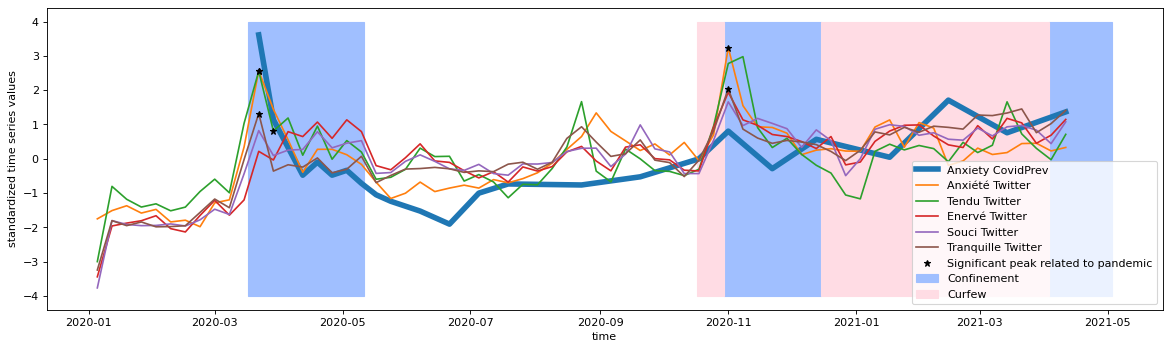

In [71]:
import matplotlib.patches as patches
import matplotlib.dates as mdates
import datetime

## 17 mars au 11 mai 1er confinement 
## 30 octobre, 15 decembre confinement 
## Couvre feu depuis 16 decembre (26 février 3e confinement ??? )
#figure(figsize=(15, 5), dpi=80)
fig, ax = plt.subplots(figsize=(18, 5), dpi=80)
#figure(figsize=(15, 5), dpi=80)
plt.plot(output_df['date'][52:119], scaled_data['CovidPrev_Anxiete'], label="Anxiety CovidPrev", linewidth=5.0)
plt.plot(output_df['date'][52:119], scaled_data['anxiety_tweets_counts'], label="Anxiété Twitter")
plt.plot(output_df['date'][52:119], scaled_data['tendu_tweet_counts'], label="Tendu Twitter")
plt.plot(output_df['date'][52:119], scaled_data['enerve_tweet_counts'], label="Enervé Twitter")
plt.plot(output_df['date'][52:119], scaled_data['souci_tweet_counts'], label="Souci Twitter")
plt.plot(output_df['date'][52:119], scaled_data['tranquille_tweet_counts'], label="Tranquille Twitter")

plt.plot(output_df['date'][52+11], scaled_data['anxiety_tweets_counts'][11], 'k*', linewidth=10.0,  label="Significant peak related to pandemic")
plt.plot(output_df['date'][52+43], scaled_data['anxiety_tweets_counts'][43], 'k*', linewidth=10.0)

plt.plot(output_df['date'][52+11], scaled_data['tranquille_tweet_counts'][11], 'k*', linewidth=10.0)
plt.plot(output_df['date'][52+43], scaled_data['tranquille_tweet_counts'][43], 'k*', linewidth=10.0)

plt.plot(output_df['date'][52+11], scaled_data['tendu_tweet_counts'][11], 'k*', linewidth=10.0)
plt.plot(output_df['date'][52+12], scaled_data['tendu_tweet_counts'][12], 'k*', linewidth=10.0)
#ax.axvspan(5, 2020-4-22, color='red')

conf1start = mdates.date2num(datetime.date(2020, 3, 17))
conf1end = mdates.date2num(datetime.date(2020, 5, 11))
conf1length = conf1end - conf1start
conf1 = patches.Rectangle((conf1start,-4), conf1length, 8, color="#a0bfff", label="Confinement")
ax.add_patch(conf1)

conf2start = mdates.date2num(datetime.date(2020, 10, 30))
conf2end = mdates.date2num(datetime.date(2020, 12, 15))
conf2length = conf2end - conf2start
conf2 = patches.Rectangle((conf2start,-4), conf2length, 8, color="#a0bfff")
ax.add_patch(conf2)


conf3start = mdates.date2num(datetime.date(2021, 4, 3))
conf3end = mdates.date2num(datetime.date(2021, 5, 3))
conf3length = conf3end - conf3start
conf3 = patches.Rectangle((conf3start,-4), conf3length, 8, color="#a0bfff")
ax.add_patch(conf3)

cvfeu1start = mdates.date2num(datetime.date(2020, 10, 17))
cvfeu1end = mdates.date2num(datetime.date(2020, 10, 30))
cvfeu1length = cvfeu1end - cvfeu1start
cvfeu1 = patches.Rectangle((cvfeu1start,-4), cvfeu1length, 8, color="#FFDCE4", label="Curfew")
ax.add_patch(cvfeu1)

cvfeu2start = mdates.date2num(datetime.date(2020, 12, 15))
cvfeu2end = mdates.date2num(datetime.date(2021, 4, 3))
cvfeu2length = cvfeu2end - cvfeu2start
cvfeu2 = patches.Rectangle((cvfeu2start,-4), cvfeu2length, 8, color="#FFDCE4")
ax.add_patch(cvfeu2)

plt.xlabel('time')
plt.ylabel('standardized time series values')
#plt.title('Evolution of the CovidPrev and Twitter time series related to anxiety')
plt.legend()
#plt.savefig('Anxiety_Twitter_HAD_TimeSeries.png', dpi=1200)
plt.savefig('Fig2A.png')
plt.show()

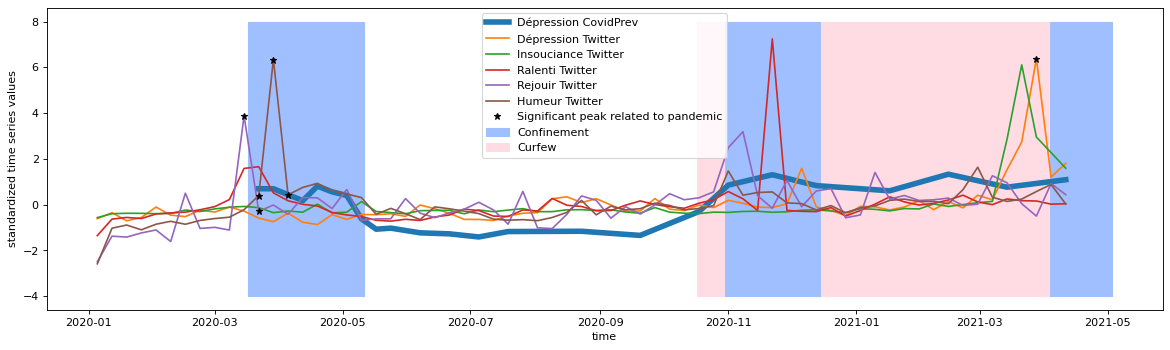

In [72]:
fig, ax = plt.subplots(figsize=(18, 5), dpi=80)
#figure(figsize=(15, 5), dpi=80)
plt.plot(output_df['date'][52:119], scaled_data['CovidPrev_Depression'], label="Dépression CovidPrev", linewidth=5.0)
plt.plot(output_df['date'][52:119], scaled_data['depression_tweet_counts'], label="Dépression Twitter")
plt.plot(output_df['date'][52:119], scaled_data['insouciance_tweet_counts'], label="Insouciance Twitter")
plt.plot(output_df['date'][52:119], scaled_data['ralenti_tweet_counts'], label="Ralenti Twitter")
plt.plot(output_df['date'][52:119], scaled_data['rejouir_tweet_counts'], label="Rejouir Twitter")
plt.plot(output_df['date'][52:119], scaled_data['humeur_tweet_counts'], label="Humeur Twitter")


plt.plot(output_df['date'][52+64], scaled_data['depression_tweet_counts'][64], 'k*', linewidth=10.0,  label="Significant peak related to pandemic")
plt.plot(output_df['date'][52+10], scaled_data['rejouir_tweet_counts'][10], 'k*', linewidth=10.0)
plt.plot(output_df['date'][52+11], scaled_data['rejouir_tweet_counts'][11], 'k*', linewidth=10.0)
plt.plot(output_df['date'][52+11], scaled_data['humeur_tweet_counts'][11], 'k*', linewidth=10.0)
plt.plot(output_df['date'][52+12], scaled_data['humeur_tweet_counts'][12], 'k*', linewidth=10.0)
plt.plot(output_df['date'][52+13], scaled_data['humeur_tweet_counts'][13], 'k*', linewidth=10.0)

conf1start = mdates.date2num(datetime.date(2020, 3, 17))
conf1end = mdates.date2num(datetime.date(2020, 5, 11))
conf1length = conf1end - conf1start
conf1 = patches.Rectangle((conf1start,-4), conf1length, 12, color="#a0bfff", label="Confinement")
ax.add_patch(conf1)

conf2start = mdates.date2num(datetime.date(2020, 10, 30))
conf2end = mdates.date2num(datetime.date(2020, 12, 15))
conf2length = conf2end - conf2start
conf2 = patches.Rectangle((conf2start,-4), conf2length, 12, color="#a0bfff")
ax.add_patch(conf2)


conf3start = mdates.date2num(datetime.date(2021, 4, 3))
conf3end = mdates.date2num(datetime.date(2021, 5, 3))
conf3length = conf3end - conf3start
conf3 = patches.Rectangle((conf3start,-4), conf3length, 12, color="#a0bfff")
ax.add_patch(conf3)

cvfeu1start = mdates.date2num(datetime.date(2020, 10, 17))
cvfeu1end = mdates.date2num(datetime.date(2020, 10, 30))
cvfeu1length = cvfeu1end - cvfeu1start
cvfeu1 = patches.Rectangle((cvfeu1start,-4), cvfeu1length, 12, color="#FFDCE4", label="Curfew")
ax.add_patch(cvfeu1)

cvfeu2start = mdates.date2num(datetime.date(2020, 12, 15))
cvfeu2end = mdates.date2num(datetime.date(2021, 4, 3))
cvfeu2length = cvfeu2end - cvfeu2start
cvfeu2 = patches.Rectangle((cvfeu2start,-4), cvfeu2length, 12, color="#FFDCE4")
ax.add_patch(cvfeu2)

plt.xlabel('time')
plt.ylabel('standardized time series values')
#plt.title('Evolution of the CovidPrev and Twitter time series related to depression')

plt.legend()
plt.savefig('Fig2B.png')
plt.show()

In [ ]:
plt.plot(output_df['date'][52+64], scaled_data['depression_tweet_counts'][64], 'k*', linewidth=10.0,  label="Significant peak related to pandemic")
plt.plot(output_df['date'][52+10], scaled_data['rejouir_tweet_counts'][10], 'k*', linewidth=10.0)
plt.plot(output_df['date'][52+11], scaled_data['rejouir_tweet_counts'][11], 'k*', linewidth=10.0)
plt.plot(output_df['date'][52+11], scaled_data['humeur_tweet_counts'][11], 'k*', linewidth=10.0)
plt.plot(output_df['date'][52+12], scaled_data['humeur_tweet_counts'][12], 'k*', linewidth=10.0)
plt.plot(output_df['date'][52+13], scaled_data['humeur_tweet_counts'][13], 'k*', linewidth=10.0)

In [60]:
output_df['date'][52+13]

Timestamp('2020-04-05 00:00:00+0000', tz='UTC')

# Most important words for all weeks

### Anxiety

In [ ]:
start_week = datetime.date(2020, 1, 5)
doc_len = len(all_tweets)

anxiety_all =[]


all_tweets = []
for i in range(len(anxiety_df)):
    if anxiety_df['date'][i] > datetime.date(2020, 1, 1) :
        all_tweets.append(anxiety_df['content'][i])

for _ in range(52,119):
    weekly_tweets = []
    print(start_week)
    for i in range(len(anxiety_df)):
        if anxiety_df['date'][i] >= start_week and anxiety_df['date'][i] <= start_week+datetime.timedelta(7): 
            weekly_tweets.append(anxiety_df['content'][i])
            
    preprocess_tweets = preprocess(weekly_tweets)
    
    all_words = set(preprocess_tweets)
    important_words = [(word, tf_idf(word)) for word in all_words]

    important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    

    anxiety_all.append(important_words[:30])
    

    start_week += datetime.timedelta(7)

In [ ]:
new = []
for week in anxiety_all:
    ll = []
    for word in week:
        if str(word[0]) == 'anxiété' or  str(word[0]) == 'anxieux' or  str(word[0]) == 'anxieuse' or str(word[0]) == 'faire' or str(word[0]) == '\n\n\n' or str(word[0]) == 'vraiment':
            pass
        else:
            ll.append(word[0])
    new.append(ll)
dff = pd.DataFrame(new)
col = []
for i in list(output_df['date'][52:119]):
    col.append(i.strftime("%m/%d/%Y"))
#new
pd.set_option('display.max_columns', None)
dff= dff.T # or df1.transpose()
dff.columns=col
dff

In [82]:
import pickle
#
#with open("anxiety_list.txt", "wb") as fp:   #Pickling
#    pickle.dump(anxiety_all, fp)
#    
#with open("depression_list.txt", "wb") as fp:   #Pickling
#    pickle.dump(depression_all, fp)

with open("anxiety_list.txt", "rb") as fp:   # Unpickling
    anxiety_all = pickle.load(fp)
    
with open("depression_list.txt", "rb") as fp:   # Unpickling
    depression_all = pickle.load(fp)
#
#test

EOFError: Ran out of input

In [81]:
anxiety_all = anxiety_all[0]
depression_all = depression_all[0]
#anxiety_all

NameError: name 'depression_all' is not defined

In [ ]:
import collections
leset = list(list(dff.iloc[0])+ list(dff.iloc[1])+list(dff.iloc[2])+list(dff.iloc[3])+list(dff.iloc[4]))
occurrences = collections.Counter(leset)
print(occurrences)

In [ ]:
lesmots = ['stress', 'peur', 'covid', 'sociale', 'confinement']

In [ ]:
legigadata = {i:[float(0.0) for _ in range(len(col))] for i in list(set(lesmots))}

for i in range(len(anxiety_all)):
    for word in anxiety_all[i]:
        if str(word[0]) in list(legigadata.keys()):
            legigadata[str(word[0])][i] = float(word[1])

        
#print(legigadata) 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO

#for word in legigadata.keys():
#    print(len(legigadata[word])) #= np.array(legigadata[word],  dtype=float)
#fig, ax = plt.subplots(figsize=(15, 6), dpi=80)    
#val = np.array(list(legigadata.values()), dtype=float)
years = [i for i in range(len(col))]
fig, ax = plt.subplots(figsize=(15, 6), dpi=80)   
ax.stackplot(output_df['date'][52:119], legigadata.values(), labels=legigadata.keys())
ax.legend(loc='upper left')
ax.set_title('Evolution of tf-idf values over time of the top 5 words in all Anxiété Tweets ')
ax.set_xlabel('time')
ax.set_ylabel('tf-idf')
plt.show()

### Depression

In [ ]:
start_week = datetime.date(2020, 1, 5)
doc_len = len(all_tweets)

depression_all =[]


all_tweets = []
for i in range(len(depression_df)):
    if depression_df['date'][i] > datetime.date(2020, 2, 1) and depression_df['date'][i] < datetime.date(2020, 3, 1) :
        all_tweets.append(depression_df['content'][i])

for _ in range(52,119):
    weekly_tweets = []
    print(start_week)
    for i in range(len(depression_df)):
        if depression_df['date'][i] >= start_week and depression_df['date'][i] <= start_week+datetime.timedelta(7): 
            weekly_tweets.append(depression_df['content'][i])
            
    preprocess_tweets = preprocess(weekly_tweets)
    
    all_words = set(preprocess_tweets)
    important_words = [(word, tf_idf(word)) for word in all_words]

    important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    

    depression_all.append(important_words[:30])
    

    start_week += datetime.timedelta(7)

In [ ]:
new = []
for week in depression_all:
    ll = []
    for word in week:
        if str(word[0]) in ['depression', 'dépression','dépressif', 'déprime', 'déprimé', 'deprimée', 'déprimée','sais', 'genre','quelqu','\nmerci','aller', 'jsuis', 'oui', 'déja', 'déjà','faut','\n\n\n', 'faire','vraiment']:
            pass
        else:
            ll.append(word[0])
    new.append(ll)
dfd = pd.DataFrame(new)
col = []
for i in list(output_df['date'][52:119]):
    col.append(i.strftime("%m/%d/%Y"))
#new
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
dfd= dfd.T # or df1.transpose()
dfd.columns=col
dfd

In [ ]:
dff.iloc[0][35:]

In [ ]:
import collections
#leset = list(list(dfd.iloc[0])+ list(dfd.iloc[1])+list(dfd.iloc[2])+list(dfd.iloc[3])+list(dfd.iloc[4]))
leset = list(list(dfd.iloc[0]))
occurrences = collections.Counter(leset)
print(occurrences)

In [ ]:
#print(set(leset))

In [ ]:
most_words = ['temps','vie','jamais', 'monde','confinement','covid']
legigadata = {i:[float(0.0) for _ in range(len(col))] for i in set(most_words)}

for i in range(len(depression_all)):
    for word in depression_all[i]:
        if str(word[0]) in list(legigadata.keys()):
            legigadata[str(word[0])][i] = float(word[1])

                
        
#print(legigadata)   
    

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO

#for word in legigadata.keys():
#    print(len(legigadata[word])) #= np.array(legigadata[word],  dtype=float)
#fig, ax = plt.subplots(figsize=(15, 6), dpi=80)    
#val = np.array(list(legigadata.values()), dtype=float)
years = [i for i in range(len(col))]
fig, ax = plt.subplots(figsize=(15, 6), dpi=80)   
ax.stackplot(output_df['date'][52:119], legigadata.values(), labels=legigadata.keys())
ax.legend(loc='upper left')
ax.set_title('Evolution of tf-idf values over time of the top 5 words in all Depression Tweets ')
ax.set_xlabel('time')
ax.set_ylabel('tf-idf')
plt.show()

In [ ]:
theONE = [[0.0 for _ in range(len(col))], [0.0 for _ in range(len(col))] ] #pandémie #not pandémie
#theONE[1]

In [ ]:
for i in range(5):
    for j in range(len(dfd.iloc[i])):
        if dfd.iloc[i][j] in ['confinement', 'covid', 'coronavirus', 'covideur', 'reconfinement']:
            for word in depression_all[j]:
                if str(word[0]) == dfd.iloc[i][j]:
                    theONE[0][j] += word[1]
        else:
            for word in depression_all[j]:
                if str(word[0]) == dfd.iloc[i][j]:
                    theONE[1][j] += word[1]

In [ ]:
newtheone = [[], []]
minimum = theONE[0][0]+theONE[1][0]
maximum = theONE[0][0]+theONE[1][0]
for i in range(0, len(theONE[0])):
    if theONE[0][i]+theONE[1][i] < minimum:
        minimum = theONE[0][i]+theONE[1][i]
    if theONE[0][i]+theONE[1][i] > maximum:
        maximum = theONE[0][i]+theONE[1][i]

print(minimum)
print(maximum)

In [ ]:
newtheone = [[], []]
minimum = min(theONE[0])
maximum = max(theONE[0])

for i in range(len(theONE[0])):
    newtheone[0].append(theONE[0][i]-minimum / maximum -minimum)
    #newtheone[1].append(theONE[1][i]-minimum / maximum -minimum)
minimum = min(theONE[1])
maximum = max(theONE[1])

for i in range(len(theONE[0])):
    newtheone[1].append(theONE[1][i]-minimum / maximum -minimum)
    #newtheone[1].append(theONE[1][i]-minimum / maximum -minimum)    
    

In [ ]:
for i in range(len(theONE[0])):
    newtheone[0].append(theONE[0][i]-minimum / maximum -minimum)
    newtheone[1].append(theONE[1][i]-minimum / maximum -minimum)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import pandas as pd
import matplotlib.dates as mdates
 
# Data
r = output_df['date'][52:119]
raw_data = {'orangeBars': theONE[1],'blueBars': theONE[0]}
df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(df['orangeBars'], df['blueBars'])]
orangeBars = [i / j * 100 for i,j in zip(df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(df['blueBars'], totals)]
 
# plot
barWidth = 5
#names = ('A','B','C','D','E')
# Create green Bars
fig, ax = plt.subplots(figsize=(20, 6), dpi=80) 
plt.bar(r, blueBars, color='#f9bc86', edgecolor='white', width=barWidth)
# Create orange Bars
plt.bar(r, orangeBars, bottom=blueBars, color='#b5ffb9', edgecolor='white', width=barWidth)
# Create blue Bars
#plt.bar(r, blueBars, bottom=[i+j for i,j in zip(greenBars, orangeBars)], color='#a3acff', edgecolor='white', width=barWidth)
 
# Custom x axis
plt.xticks(r)
plt.xlabel("group")
ax.xaxis.set_major_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %y'))
 
# Show graphic
plt.show()

In [ ]:
dfd.iloc[0][0]

In [ ]:
#dfd.to_csv('depression_most_keywords.csv')

In [ ]:
legigadata = {i:[float(0.0) for _ in range(len(col))] for i in list(leset)}
print(legigadata) 

In [ ]:
list(legigadata.values())

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO

#for word in legigadata.keys():
#    print(len(legigadata[word])) #= np.array(legigadata[word],  dtype=float)
#fig, ax = plt.subplots(figsize=(15, 6), dpi=80)    
val = np.array(list(legigadata.values()), dtype=float)
years = [i for i in range(len(col))]
fig, ax = plt.subplots(figsize=(15, 6), dpi=80)   
ax.stackplot(years, newtheone)
ax.legend(loc='upper left')
#ax.set_title('World population')
#ax.set_xlabel('Year')
#ax.set_ylabel('Number of people (millions)')
plt.show()

In [ ]:
import plotly.express as px
df = pd.DataFrame(legigadata)
df
#fig = px.area(df, x="year", y="pop", color="continent", line_group="country")
#fig.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# data from United Nations World Population Prospects (Revision 2019)
# https://population.un.org/wpp/, license: CC BY 3.0 IGO
year = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2018]
population_by_continent = {
    'africa': [228, 284, 365, 477, 631, 814, 1044, 1275],
    'americas': [340, 425, 519, 619, 727, 840, 943, 1006],
    'asia': [1394, 1686, 2120, 2625, 3202, 3714, 4169, 4560],
    'europe': [220, 253, 276, 295, 310, 303, 294, 293],
    'oceania': [12, 15, 19, 22, 26, 31, 36, 39],
}
print(population_by_continent.values())
fig, ax = plt.subplots()
ax.stackplot(year, population_by_continent.values(),
             labels=population_by_continent.keys())
ax.legend(loc='upper left')
ax.set_title('World population')
ax.set_xlabel('Year')
ax.set_ylabel('Number of people (millions)')

plt.show()

In [ ]:
col

In [ ]:
list(dfd.iloc[0])

# Trying stuff 

In [ ]:
doc_len = len(all_tweets)


def tfidf(word, all_tweets, doc_len, preprocess_tweets, all_words):
    import math
    word_doc_freq = [1 for w in all_tweets if word in w]
    if sum(word_doc_freq) == 0:
        word_doc_freq = [1]
    idf = math.log(doc_len / sum(word_doc_freq))
    
    tf = preprocess_tweets.count(word) / len(all_words)
    return tf * idf

In [ ]:
#getting all the tweets since the the beginning of 2020
all_tweets = []
for i in range(len(anxiety_df)):
    if anxiety_df['date'][i] > datetime.date(2020, 1, 1) :
        all_tweets.append(anxiety_df['content'][i])

In [ ]:
start_week = datetime.date(2020, 1, 1)
doc_len = len(all_tweets)
confinement =[]
covid =[]
coronavirus =[]
situation =[]
covid19 =[]
couvre=[]
feu =[]

for _ in range(52,119):
    weekly_tweets = []
    print(start_week)
    for i in range(len(anxiety_df)):
        if anxiety_df['date'][i] >= start_week and anxiety_df['date'][i] <= start_week+datetime.timedelta(7): 
            weekly_tweets.append(anxiety_df['content'][i])
            
    preprocess_tweets = preprocess(weekly_tweets)
    all_words = set(preprocess_tweets)
    confinement.append(tfidf("confinement", all_tweets, doc_len, preprocess_tweets, all_words ))
    covid.append(tfidf("covid", all_tweets, doc_len, preprocess_tweets, all_words ))
    coronavirus.append(tfidf("coronavirus", all_tweets, doc_len, preprocess_tweets, all_words ))
    situation.append(tfidf("situation", all_tweets, doc_len, preprocess_tweets, all_words ))
    covid19.append(tfidf("covid19", all_tweets, doc_len, preprocess_tweets, all_words ))
    couvre.append(tfidf("couvre", all_tweets, doc_len, preprocess_tweets, all_words ))
    feu.append(tfidf("feu", all_tweets, doc_len, preprocess_tweets, all_words ))
    start_week += datetime.timedelta(7)

In [ ]:
fig, ax = plt.subplots(figsize=(15, 6), dpi=80)
plt.plot(output_df['date'][52:119], confinement, label="confinement")
plt.plot(output_df['date'][52:119], covid, label="covid")
plt.plot(output_df['date'][52:119], coronavirus, label="coronavirus")
plt.plot(output_df['date'][52:119], situation, label="situation")
plt.plot(output_df['date'][52:119], covid19, label="covid19")
plt.plot(output_df['date'][52:119], couvre, label="couvre")
plt.plot(output_df['date'][52:119], feu, label="feu")

conf1start = mdates.date2num(datetime.date(2020, 3, 17))
conf1end = mdates.date2num(datetime.date(2020, 5, 11))
conf1length = conf1end - conf1start
conf1 = patches.Rectangle((conf1start,-0), conf1length, 0, color="#a0bfff", label="confinement")
ax.add_patch(conf1)

conf2start = mdates.date2num(datetime.date(2020, 10, 30))
conf2end = mdates.date2num(datetime.date(2020, 12, 15))
conf2length = conf2end - conf2start
conf2 = patches.Rectangle((conf2start,-0), conf2length, 0, color="#a0bfff")
ax.add_patch(conf2)


conf3start = mdates.date2num(datetime.date(2021, 4, 3))
conf3end = mdates.date2num(datetime.date(2021, 5, 3))
conf3length = conf3end - conf3start
conf3 = patches.Rectangle((conf3start,-0), conf3length, 0, color="#a0bfff")
ax.add_patch(conf3)

cvfeu1start = mdates.date2num(datetime.date(2020, 10, 17))
cvfeu1end = mdates.date2num(datetime.date(2020, 10, 30))
cvfeu1length = cvfeu1end - cvfeu1start
cvfeu1 = patches.Rectangle((cvfeu1start,-0), cvfeu1length, 0, color="#FFDCE4", label="couvre feu")
ax.add_patch(cvfeu1)

cvfeu2start = mdates.date2num(datetime.date(2020, 12, 15))
cvfeu2end = mdates.date2num(datetime.date(2021, 4, 3))
cvfeu2length = cvfeu2end - cvfeu2start
cvfeu2 = patches.Rectangle((cvfeu2start,-0), cvfeu2length, 0, color="#FFDCE4")
ax.add_patch(cvfeu2)

plt.legend()
plt.show()

In [ ]:
start_week = datetime.date(2020, 1, 1)
doc_len = len(all_tweets)

THEDATA =[]


all_tweets = []
for i in range(len(anxiety_df)):
    if anxiety_df['date'][i] > datetime.date(2020, 1, 1) :
        all_tweets.append(anxiety_df['content'][i])

for _ in range(52,119):
    weekly_tweets = []
    print(start_week)
    for i in range(len(anxiety_df)):
        if anxiety_df['date'][i] >= start_week and anxiety_df['date'][i] <= start_week+datetime.timedelta(7): 
            weekly_tweets.append(anxiety_df['content'][i])
            
    preprocess_tweets = preprocess(weekly_tweets)
    #remove anxieux
    if "anxieux" in preprocess_tweets:
        preprocess_tweets.remove("anxieux")
    if "anxiété" in preprocess_tweets:
        preprocess_tweets.remove("anxiété")
    if "anxieuse" in preprocess_tweets:
        preprocess_tweets.remove("anxieuse")
    
    all_words = set(preprocess_tweets)
    important_words = [(word, tf_idf(word)) for word in all_words]

    important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    

    THEDATA.append(important_words[:30])
    

    start_week += datetime.timedelta(7)

In [ ]:
THEDATA

In [ ]:
copy = THEDATA

In [ ]:
new = []
for week in copy:
    ll = []
    for word in week:
        if str(word[0]) == 'anxiété' or  str(word[0]) == 'anxieux' or  str(word[0]) == 'anxieuse' or str(word[0]) == 'faire' or str(word[0]) == '\n\n\n' or str(word[0]) == 'vraiment':
            pass
        else:
            ll.append(word[0])
    new.append(ll)
dff = pd.DataFrame(new)
col = []
for i in list(output_df['date'][52:119]):
    col.append(i.strftime("%m/%d/%Y"))
#new
pd.set_option('display.max_columns', None)
dff= dff.T # or df1.transpose()
dff.columns=col
dff
            

In [ ]:
dff = pd.DataFrame(new)

In [ ]:
pd.set_option('display.max_columns', None)
dff= dff.T # or df1.transpose()
dff.columns=col
dff

In [ ]:
'a' != lll[0]

In [ ]:
list(output_df['date'][52:119]).strftime("%m/%d/%Y")

In [ ]:
col = []
for i in list(output_df['date'][52:119]):
    col.append(i.strftime("%m/%d/%Y"))

In [ ]:
col

### Tf-Idf

In [ ]:
#getting all the tweets from the week we are interested in
weekly_tweets = []

import datetime
for i in range(len(anxiety_df)):
    if anxiety_df['date'][i] >= datetime.date(2020, 3, 11) and anxiety_df['date'][i] <= datetime.date(2020, 3, 17): 
        weekly_tweets.append(anxiety_df['content'][i])


In [ ]:
#getting all the tweets since the the beginning of 2020
all_tweets = []
for i in range(len(anxiety_df)):
    if anxiety_df['date'][i] > datetime.date(2020, 1, 1) :
        all_tweets.append(anxiety_df['content'][i])

In [ ]:
def preprocess(data):
    data = remove_punc_links(data)
    data = convert_lower_case(data)
    data = remove_single_characters(data)

    data = remove_stop_words(data)
    #data = stemming(data)
    return data
    
def convert_lower_case(data):
    for i in range(len(data)):
        data[i] = data[i].lower()
    return data

def remove_punc_links(data):
    import re
    data = ''.join(data)
    no_links = re.sub(r'http\S+', '', data)
    no_punc = re.sub(r'[^\w\s]',' ',no_links) #Keeps hashtags
    data = no_punc.split(" ")
    return data
    
def remove_single_characters(data):
    data = [w for w in data if len(w) > 2]
    return data

def remove_stop_words(data):
    data = [w for w in data if w not in MyStopwords]
    return data

In [ ]:
preprocess_tweets = preprocess(weekly_tweets)

In [ ]:


def tf_idf(word):
    doc_len = len(all_tweets)
    words_len = len(weekly_tweets)
    import math
    word_doc_freq = [1 for w in all_tweets if word in w]
    if sum(word_doc_freq) == 0:
        word_doc_freq = [1]
    idf = math.log(doc_len / sum(word_doc_freq))
    
    tf = preprocess_tweets.count(word) / len(all_words)
    return tf * idf

In [ ]:
all_words = set(preprocess_tweets)

important_words = [(word, tf_idf(word)) for word in all_words]

important_words = sorted(important_words,reverse=True, key=lambda x: x[1])    

important_words[:30]

In [ ]:
import math
doc_len = len(all_tweets)
words_len = len(preprocess_tweets)

tf_idf = []
for i in most_occur:
    word = i[0]
    j = 0
    word_doc_freq = [j+1 for w in twts if word in w]
    #print(sum(word_doc_freq))
    idf = math.log(doc_len / sum(word_doc_freq))
    #print(i[0])
    tf = i[1] / words_len
    #print(idf)
    tf_idf.append((word, tf*idf))
    
tf_idf = sorted(tf_idf,reverse=True, key=lambda x: x[1])

for i in range(len(tf_idf)):
    print( tf_idf[i][0], tf_idf[i][1])

In [ ]:
output_df

In [ ]:
output_df.to_csv('twitter_output_anxiety.csv')

In [ ]:
output_df['date'][53]

In [ ]:
import statsmodels.api as sm

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(output_df[['date','anxiety_tweets_counts']][52:119], model='additive')
fig = decomposition.plot()
plt.show()